In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Data has some underlying shape. TDA exploits that idea, with the hope that the noisiness/high-dimensionality/etc. of data may be less of a hassle if we extract the shape and work with that. 
### Often, the pipeline looks a bit like this: data $\rightarrow$ obtain topological representation (like a simplicial complex) $\rightarrow$  compute something from it (like holes) $\rightarrow$ extract parameters of interest. About simplicial complexes, 0D: vertex, 1D: edge, 2D: triangle, 3D: tetrahedron, ... 

## 6.1 RIPS Complex

### One of the most commmonly used simplicial complex is known as the RIPS complex. Let's show pictorially what it means

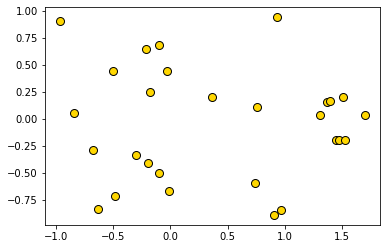

In [53]:
#generate a bunch of points, with some circular datapoints
n = 20
np.random.seed(33)
x = [np.random.uniform(-1,1) for i in range(n)]
y = [np.random.uniform(-1,1) for i in range(n)]
thetalist = [np.random.uniform(0,2*np.pi) for i in range(8)]
x_circ = [1.5+0.2*np.cos(theta) for theta in thetalist]
y_circ = [0.2*np.sin(theta) for theta in thetalist]

x+=x_circ
y+=y_circ

plt.figure()
plt.scatter(x, y, facecolor = 'gold', edgecolor = 'k', s = 64);

### We have our datapoints. TDA is all about shape of data, and the proximity of a datapoint to another is a key topological information. So, naturally, we care about distances between points. Let's start by defining a distance $\epsilon$ that we will call the threshold.

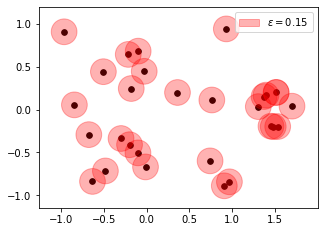

In [57]:
epsilon = 0.15

fig, ax = plt.subplots(figsize = (5,5))
plt.gca().set_aspect('equal', adjustable='box')

ax.scatter(x, y, facecolor = 'k', edgecolor = 'k', s = 32)

for i in range(len(x)):
    circle = plt.Circle((x[i], y[i]), epsilon, color='r', alpha = 0.3)
    ax.add_patch(circle)
circle = plt.Circle((x[i], y[i]), epsilon, color='r', alpha = 0.3, label = r'$\epsilon = 0.15$')
ax.add_patch(circle)
ax.legend();

### For our chosen $\epsilon$, we surround each datapoint by a circle of that radius. Then, it bears to see that some circles will intersect with others (in a nearest-neighbor) fashion, and others won't intersect with any, etc. Varying this threshold from small to large will cause the extent of intersection to increase with time until we can image the whole space to be filled with intersecting circles. Also, notice how our datapoints with circular structure on the right create circles with a hole in between.

### In the next step, we connect each datapoint with another datapoint assuming their circles intersect. Basically, we add to points to a local subset assuming the distance between them $d < \epsilon$. 

### As you may imagine, this requires the creation of a pairwise distance matrix. Then, we create a mask that checks for the distance condition.

In [71]:
import sklearn.metrics as metrics

X = np.array([x, y]).T
D = metrics.pairwise_distances(X, Y=None, metric='euclidean')

mask = D<2*epsilon

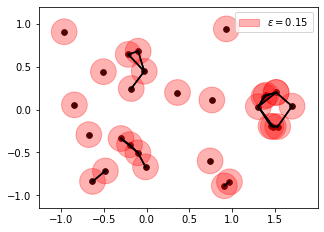

In [72]:
fig, ax = plt.subplots(figsize = (5,5))
plt.gca().set_aspect('equal', adjustable='box')

ax.scatter(x, y, facecolor = 'k', edgecolor = 'k', s = 32)

for i in range(len(x)):
    circle = plt.Circle((x[i], y[i]), epsilon, color='r', alpha = 0.3)
    ax.add_patch(circle)
circle = plt.Circle((x[i], y[i]), epsilon, color='r', alpha = 0.3, label = r'$\epsilon = 0.15$')

for i in range(len(x)):
    for j in range(len(x)):
        val = mask[j][i]
        if val == True:
            ax.plot([x[i], x[j]], [y[i], y[j]], 'k-')
ax.add_patch(circle)
ax.legend();